In [2]:
"""HARMONIZOME

The exercise here is to quantify HOW many diseases are there for which we have "disease" signatures

Structure:
    1. Imports, Variables, Functions
    2. Retrieve Data
"""
# 1. Imports, Variables, Functions
# imports
import sys
sys.path.append('../scripts/')
from harmonizomeapi import Harmonizome, Entity

# variables


# functions

def get_all_datasets():
    # Fetch all datasets from Harmonizome
    datasets = Harmonizome.get(Entity.DATASET)
    #print(datasets)
    # Filter datasets relevant to differential expression (this might need refinement)
    #de_datasets = [dataset for dataset in datasets['entities'] if 'Differential Expression' in dataset['name']]
    
    return datasets

def get_gene_sets_for_dataset(dataset_name):
    # Fetch gene sets associated with the given dataset
    gene_sets = Harmonizome.get(Entity.GENE_SET, name=dataset_name)
    
    return gene_sets['entities']

# 2. Retrieve Data
datasets = get_all_datasets()
all_gene_sets = {}

for dataset in datasets:
    dataset_name = dataset['name']
    gene_sets = get_gene_sets_for_dataset(dataset_name)
    all_gene_sets[dataset_name] = gene_sets

print(all_gene_sets)



TypeError: string indices must be integers, not 'str'

In [19]:
import requests

def get_all_datasets():
    base_url = "http://amp.pharm.mssm.edu/Harmonizome"
    datasets = []
    next_url = "/api/1.0/dataset"
    
    while next_url:
        response = requests.get(base_url + next_url).json()
        datasets.extend(response['entities'])
        next_url = response.get('next', None)
    
    return datasets

# Example usage:
all_datasets = get_all_datasets()
print(all_datasets)



[{'name': 'Achilles Cell Line Gene Essentiality Profiles', 'href': '/api/1.0/dataset/Achilles+Cell+Line+Gene+Essentiality+Profiles'}, {'name': 'Allen Brain Atlas Adult Human Brain Tissue Gene Expression Profiles', 'href': '/api/1.0/dataset/Allen+Brain+Atlas+Adult+Human+Brain+Tissue+Gene+Expression+Profiles'}, {'name': 'Allen Brain Atlas Adult Mouse Brain Tissue Gene Expression Profiles', 'href': '/api/1.0/dataset/Allen+Brain+Atlas+Adult+Mouse+Brain+Tissue+Gene+Expression+Profiles'}, {'name': 'Allen Brain Atlas Developing Human Brain Tissue Gene Expression Profiles by Microarray', 'href': '/api/1.0/dataset/Allen+Brain+Atlas+Developing+Human+Brain+Tissue+Gene+Expression+Profiles+by+Microarray'}, {'name': 'Allen Brain Atlas Developing Human Brain Tissue Gene Expression Profiles by RNA-seq', 'href': '/api/1.0/dataset/Allen+Brain+Atlas+Developing+Human+Brain+Tissue+Gene+Expression+Profiles+by+RNA-seq'}, {'name': 'Allen Brain Atlas Prenatal Human Brain Tissue Gene Expression Profiles', 'href

In [3]:
from harmonizomeapi import Harmonizome, Entity

def get_all_datasets():
    """Get All Datasets
    Function which retrieves from HARMONIZOME API all datasets of 
    interest
    """

    response = Harmonizome.get(Entity.DATASET)
    next_url=True
    datasets = response["entities"]

    while next_url:
        # Use the Harmonizome.next function for pagination
        response = Harmonizome.next(response)        
        datasets.extend(response['entities'])
        next_url = response.get("next","None")

    return datasets

# Example usage:
all_datasets = get_all_datasets()
print(len(all_datasets))




123


In [4]:
import re

def get_href_interest(dataset_list, key_words):
    """Get HREF of Interest based on multiple keywords using regex."""
    hrefs = []
    
    for dataset in dataset_list:
        if all(re.search(keyword, dataset["name"], re.IGNORECASE) for keyword in key_words):
            hrefs.append(dataset["href"])
    
    return hrefs

# Example usage:
keywords = ["GEO", "Differential","Disease"]
hrefs_of_interest = get_href_interest(all_datasets, keywords)
print(hrefs_of_interest)


['/api/1.0/dataset/GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases']


In [5]:
import requests
import os

def download_dataset(href, save_path="."):
    """Download dataset data from Harmonizome using href."""
    base_url = "http://amp.pharm.mssm.edu/Harmonizome"
    response = requests.get(base_url + href)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Create a filename based on the href
        filename = os.path.join(save_path, href.split('/')[-1] + ".json")
        
        # Save the response data to a file
        with open(filename, 'w') as file:
            file.write(response.text)
        
        print(f"Data saved to {filename}")
    else:
        print(f"Failed to download data for href: {href}")

# Example usage:
for href in hrefs_of_interest:
    download_dataset(href)


Data saved to ./GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases.json


In [7]:
base_url = "http://amp.pharm.mssm.edu/Harmonizome"
response = requests.get( base_url+ hrefs_of_interest[0])

In [56]:
import json

data = response.text

json.loads(data)["geneSets"]

[{'name': 'Acne_Sebocyte_GSE10432/GEO Signatures of Differentially Expressed Genes for Diseases',
  'href': '/api/1.0/gene_set/Acne_Sebocyte_GSE10432/GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases'},
 {'name': 'Actinic keratosis_Skin tissue_GSE2503/GEO Signatures of Differentially Expressed Genes for Diseases',
  'href': '/api/1.0/gene_set/Actinic+keratosis_Skin+tissue_GSE2503/GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases'},
 {'name': 'Acute Lung Injury_Lung Tissue_GSE1871/GEO Signatures of Differentially Expressed Genes for Diseases',
  'href': '/api/1.0/gene_set/Acute+Lung+Injury_Lung+Tissue_GSE1871/GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases'},
 {'name': 'Acute Lung Injury_Whole blood_GSE10474/GEO Signatures of Differentially Expressed Genes for Diseases',
  'href': '/api/1.0/gene_set/Acute+Lung+Injury_Whole+blood_GSE10474/GEO+Signatures+of+Differentially+Expressed+Genes+for+Diseases'},
 {'name': 'Acute pancreatitis_Pancreas_GSE3644/G

In [35]:
import re

def extract_disease_name(entry_name):
    """Extract the disease name from the entry name."""
    # Split the name by underscores and take the first part as the disease name
    return entry_name.split('_')[0]

# Test with a sample entry
entry_name = 'Acne_Sebocyte_GSE10432/GEO Signatures of Differentially Expressed Genes for Diseases'
print(extract_disease_name(entry_name))

[{'gene': {'symbol': 'RRM2', 'href': '/api/1.0/gene/RRM2'},
  'thresholdValue': -1.0,
  'standardizedValue': -2.34584},
 {'gene': {'symbol': 'CXCR1', 'href': '/api/1.0/gene/CXCR1'},
  'thresholdValue': -1.0,
  'standardizedValue': -1.30883},
 {'gene': {'symbol': 'BRCA2', 'href': '/api/1.0/gene/BRCA2'},
  'thresholdValue': -1.0,
  'standardizedValue': -1.07662},
 {'gene': {'symbol': 'KCNK3', 'href': '/api/1.0/gene/KCNK3'},
  'thresholdValue': 1.0,
  'standardizedValue': 1.16107},
 {'gene': {'symbol': 'KCNS3', 'href': '/api/1.0/gene/KCNS3'},
  'thresholdValue': 1.0,
  'standardizedValue': 1.81927},
 {'gene': {'symbol': 'SYT5', 'href': '/api/1.0/gene/SYT5'},
  'thresholdValue': 1.0,
  'standardizedValue': 1.5764},
 {'gene': {'symbol': 'GORASP2', 'href': '/api/1.0/gene/GORASP2'},
  'thresholdValue': 1.0,
  'standardizedValue': 1.89659},
 {'gene': {'symbol': 'BCS1L', 'href': '/api/1.0/gene/BCS1L'},
  'thresholdValue': 1.0,
  'standardizedValue': 1.43582},
 {'gene': {'symbol': 'EIF2B5', 'hre

In [58]:
import xml.etree.ElementTree as ET

def parse_mesh_data(file_path):
    """Parse MeSH XML data and extract disease terms."""
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract disease terms
    disease_terms = []
    for descriptor in root.findall('DescriptorRecord'):
        term = descriptor.find('DescriptorName/String').text
        disease_terms.append(term)

    return disease_terms

# Example usage
mesh_file_path = '../data/desc2023.xml'
disease_terms = parse_mesh_data(mesh_file_path)
print(disease_terms)


['Calcimycin', 'Temefos', 'Abattoirs', 'Abbreviations as Topic', 'Abdomen', 'Abdomen, Acute', 'Abdominal Injuries', 'Abdominal Neoplasms', 'Abdominal Muscles', 'Abducens Nerve', 'Abelson murine leukemia virus', 'Abetalipoproteinemia', 'Congenital Abnormalities', 'Abnormalities, Drug-Induced', 'Abnormalities, Multiple', 'Abnormalities, Radiation-Induced', 'ABO Blood-Group System', 'Abomasum', 'Abortifacient Agents', 'Abortifacient Agents, Nonsteroidal', 'Abortifacient Agents, Steroidal', 'Abortion, Spontaneous', 'Abortion Applicants', 'Abortion, Criminal', 'Abortion, Eugenic', 'Abortion, Habitual', 'Abortion, Incomplete', 'Abortion, Induced', 'Abortion, Legal', 'Abortion, Missed', 'Abortion, Septic', 'Abortion, Therapeutic', 'Abortion, Threatened', 'Abortion, Veterinary', 'Abreaction', 'Abrin', 'Abruptio Placentae', 'Abscess', 'Peritonsillar Abscess', 'Abscisic Acid', 'Absenteeism', 'Absorption', 'Abstracting and Indexing', 'Dental Abutments', 'Acacia', 'Academic Medical Centers', 'Acad

In [107]:
import xml.etree.ElementTree as ET

def parse_mesh_hierarchy(file_path):
    """Parse MeSH XML data and build a hierarchical classification of diseases."""
    tree = ET.parse(file_path)
    root = tree.getroot()
    terms = list()
    # Dictionary to store the hierarchy
    hierarchy = {}

    for descriptor in root.findall('DescriptorRecord'):
        term = descriptor.find('DescriptorName/String').text
        tree_numbers = [tn.text for tn in descriptor.findall('TreeNumberList/TreeNumber')]

        # Filter out tree numbers that don't start with 'C' (diseases)
        tree_numbers = [tn for tn in tree_numbers if tn.startswith('C')]

        if not tree_numbers:
            continue

        for tn in tree_numbers:
            # Split the tree number to get the hierarchy levels
            levels = tn.split('.')
            d = hierarchy
            for level in levels:
                d = d.setdefault(level, {})
            d[term] = {}
            terms.append(term)
    return terms, hierarchy

# Example usage
mesh_file_path = '../data/desc2023.xml'
terms, hierarchy = parse_mesh_hierarchy(mesh_file_path)


In [115]:
import xml.etree.ElementTree as ET

def extract_disease_hierarchy(file_path):
    """Extract the hierarchical classification of diseases from MeSH XML data."""
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Dictionary to store the hierarchy
    hierarchy = {}

    # First, build the structure without adding the terms
    for descriptor in root.findall('DescriptorRecord'):
        tree_numbers = [tn.text for tn in descriptor.findall('TreeNumberList/TreeNumber')]
        tree_numbers = [tn for tn in tree_numbers if tn.startswith('C')]

        for tn in tree_numbers:
            levels = tn.split('.')
            d = hierarchy
            for level in levels:
                d = d.setdefault(level, {})

    # Now, add the terms to the appropriate lists in the hierarchy
    for descriptor in root.findall('DescriptorRecord'):
        term = descriptor.find('DescriptorName/String').text
        tree_numbers = [tn.text for tn in descriptor.findall('TreeNumberList/TreeNumber')]
        tree_numbers = [tn for tn in tree_numbers if tn.startswith('C')]

        for tn in tree_numbers:
            levels = tn.split('.')
            d = hierarchy
            for i, level in enumerate(levels):
                if i == len(levels) - 1:  # If it's the last level
                    d = d.setdefault(level, [])
                    if term not in d:  # Avoid duplicate entries
                        d.append(term)
                else:
                    d = d[level]

    return hierarchy

# Example usage
mesh_file_path = '../data/desc2023.xml'
hierarchy = extract_disease_hierarchy(mesh_file_path)


AttributeError: 'dict' object has no attribute 'append'

In [121]:
import xml.etree.ElementTree as ET

def extract_mesh_descriptor(file_path, tree_number_target):
    """Extract the descriptor name for a given MeSH tree number."""
    tree = ET.parse(file_path)
    root = tree.getroot()

    for descriptor in root.findall('DescriptorRecord'):
        tree_numbers = [tn.text for tn in descriptor.findall('TreeNumberList/TreeNumber')]
        if tree_number_target in tree_numbers:
            return descriptor.find('DescriptorName/String').text
    return None

# Example usage
mesh_file_path = '../data/desc2023.xml'
descriptor_name = extract_mesh_descriptor(mesh_file_path, "C10")

print(descriptor_name)


Nervous System Diseases


In [110]:
len(set(terms))

5004

In [65]:
def parse_mesh_disease_hierarchy(file_path):
    """Parse MeSH XML data and build a hierarchical classification of diseases."""
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Dictionary to store the hierarchy
    hierarchy = {}

    for descriptor in root.findall('DescriptorRecord'):
        term = descriptor.find('DescriptorName/String').text
        tree_numbers = [tn.text for tn in descriptor.findall('TreeNumberList/TreeNumber')]

        # Filter for tree numbers that start with "C" (Diseases category)
        tree_numbers = [tn for tn in tree_numbers if tn.startswith('C')]

        for tn in tree_numbers:
            # Split the tree number to get the hierarchy levels
            levels = tn.split('.')
            d = hierarchy
            for level in levels:
                d = d.setdefault(level, {})
            d[term] = {}

    return hierarchy

disease_hierarchy = parse_mesh_disease_hierarchy(mesh_file_path)


In [74]:
a = [int(d[1:]) for d in disease_hierarchy.keys()]
a.sort()
print(a)

[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


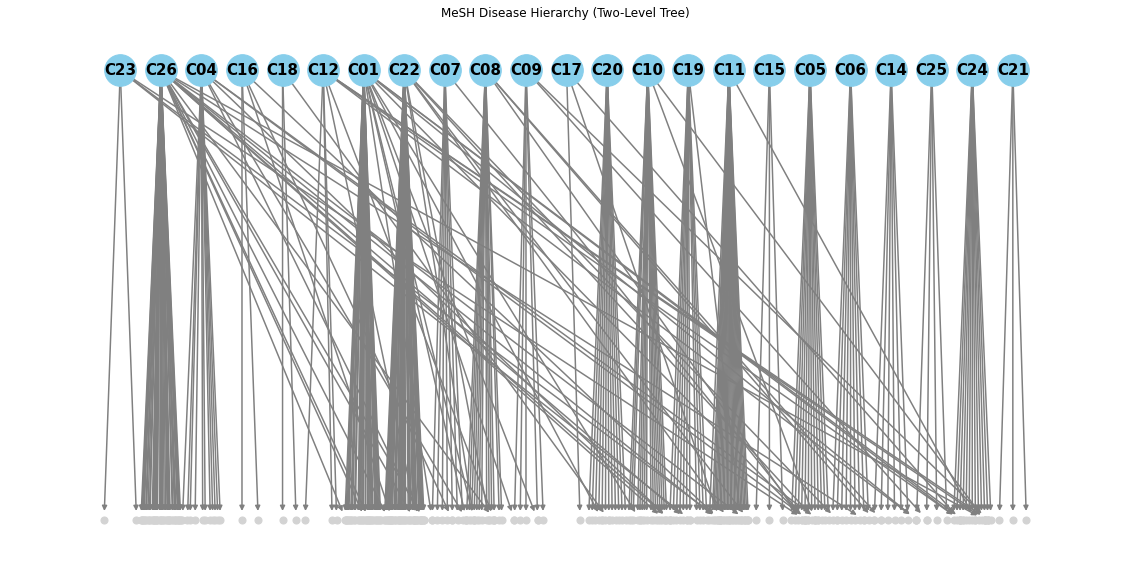

In [92]:
def build_two_level_tree(hierarchy):
    """Build a two-level tree structure."""
    tree = {}
    for key, value in hierarchy.items():
        tree[key] = list(value.keys())
    return tree

def plot_two_level_tree(tree, graph):
    """Plot a two-level tree."""
    pos = {}
    level = 0
    width = 2.
    dx = width / len(tree)
    nextx = - width/2 - dx/2
    for root, children in tree.items():
        nextx += dx
        pos[root] = (nextx, -level)
        child_dx = dx / max(len(children), 1)
        child_nextx = nextx - dx/2 - child_dx/2
        for child in children:
            child_nextx += child_dx
            pos[child] = (child_nextx, -level-1)
    return pos

# Build the two-level tree structure
two_level_tree = build_two_level_tree(disease_hierarchy)

# Create a networkx graph from the two-level tree structure
G = nx.DiGraph()
for parent, children in two_level_tree.items():
    for child in children:
        G.add_edge(parent, child)

# Plot the two-level tree
pos = plot_two_level_tree(two_level_tree, G)
plt.figure(figsize=(20, 10))
nx.draw_networkx_nodes(G, pos, nodelist=two_level_tree.keys(), node_size=1000, node_color="skyblue")
nx.draw_networkx_nodes(G, pos, nodelist=[node for children in two_level_tree.values() for node in children], node_size=50, node_color="lightgray")
nx.draw_networkx_labels(G, pos, labels={node: node for node in two_level_tree.keys()}, font_size=15, font_weight="bold")
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray")
plt.title("MeSH Disease Hierarchy (Two-Level Tree)")
plt.axis("off")
plt.show()


In [86]:
disease_hierarchy

{'C23': {'888': {'592': {'612': {'054': {'200': {'Abdomen, Acute': {}},
      'Abdominal Pain': {}},
     '540': {'500': {'Morton Neuroma': {}}, 'Metatarsalgia': {}},
     '664': {'275': {'Morton Neuroma': {}},
      'Neuralgia': {},
      '800': {'Sciatica': {}},
      '550': {'Neuralgia, Postherpetic': {}},
      '675': {'Piriformis Muscle Syndrome': {}},
      '737': {'Pudendal Neuralgia': {}}},
     '212': {'Cancer Pain': {}},
     '860': {'Pain, Procedural': {}},
     '233': {'500': {'Angina Pectoris': {},
       '150': {'150': {'Angina Pectoris, Variant': {}},
        'Angina, Unstable': {}},
       '575': {'Angina, Stable': {}}},
      'Chest Pain': {}},
     '107': {'Back Pain': {},
      '400': {'Low Back Pain': {}},
      '200': {'Failed Back Surgery Syndrome': {}}},
     '944': {'500': {'Dysmenorrhea': {}},
      'Pelvic Pain': {},
      '750': {'Piriformis Muscle Syndrome': {}},
      '625': {'Pelvic Girdle Pain': {}}},
     '302': {'Earache': {}},
     '330': {'Facial Pain